In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from vtk_rw import read_vtk
from plotting import plot_surf_stat_map, crop_img

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [30]:
def plot_inflated(data, v, f, sulc, hemi, thr=1e-50):
    sns.set_style('white')
    
    
    if hemi == 'right':
        lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(10,7) ,threshold=thr, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(10,7), threshold=thr, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()
        
        
    elif hemi == 'left':
        lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(10,7) ,threshold=thr, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(10,7), threshold=thr, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()

In [4]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

In [5]:
colors = sns.color_palette('cubehelix', 10)

In [18]:
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_infl200.vtk'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'
lh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/lh_fullmask.npy'
#lh_t1_file = '/scr/ilz3/myelinconnect/new_groupavg/t1/smooth_3/lh_t1_avg_smooth_3.npy'

rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_infl200.vtk'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'
rh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/rh_fullmask.npy'
#rh_t1_file = '/scr/ilz3/myelinconnect/new_groupavg/t1/smooth_3/rh_t1_avg_smooth_3.npy'

In [19]:
t1_predict_file_left = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/lh_smooth_3_t1avg_by_fc_maps_0_to_10.pkl'
t1_predict_file_right = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/rh_smooth_3_t1avg_by_fc_maps_0_to_10.pkl'

## T1avg prediction

In [20]:
#t1_lh = np.load(lh_t1_file)
lh_mask = np.load(lh_mask_file)
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)

#t1_rh = np.load(rh_t1_file)
rh_mask = np.load(rh_mask_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)

#t1_lh[lh_mask]=0
#t1_rh[rh_mask]=0

In [21]:
t1_predict_rh = load_pickle(t1_predict_file_right)
t1_predict_lh = load_pickle(t1_predict_file_left)

In [22]:
df = pd.DataFrame()
df['x']=np.concatenate((np.arange(1,11),np.arange(1,11)))
df['coeff'] = np.concatenate((t1_predict_lh['coef'], t1_predict_rh['coef']))
df['coeff_abs'] = np.abs(np.concatenate((t1_predict_lh['coef'], t1_predict_rh['coef'])))
df['hemi']=10*['left']+10*['right']

###Left
[ 67.75555885 -30.07258293   5.95083057  23.26855728  38.66065615
 -19.94523832 -34.69239779  -9.86272375 -35.65229894  -8.6024437 ]
###Right
[ 74.454319   -24.93261893  -7.74051901   8.59659426  30.06551419
  39.14325747 -48.06407975  14.09567008  13.14211547  -2.69479815]


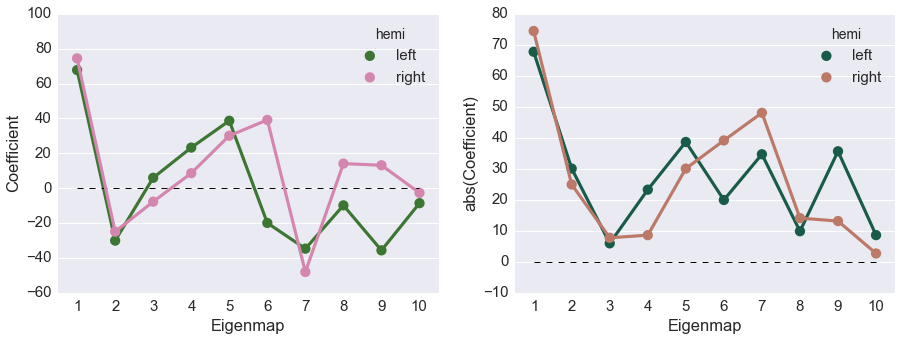

In [34]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

fig=plt.figure(figsize=(15,5))
fig.add_subplot(121)
g1 = sns.pointplot(data=df, x='x', y='coeff', hue='hemi', palette=[colors[3], colors[6]])
g1.set_ylabel('Coefficient')
g1.set_xlabel('Eigenmap')
g1.hlines(0, 0, 9, linestyle='--', linewidth=1)

fig.add_subplot(122)
g2 = sns.pointplot(data=df, x='x', y='coeff_abs', hue='hemi', palette=[colors[2], colors[5]])
g2.set_ylabel('abs(Coefficient)')
g2.set_xlabel('Eigenmap')
g2.hlines(0, 0, 9, linestyle='--', linewidth=1)

print '###Left'
print t1_predict_lh['coef']
print '###Right'
print t1_predict_rh['coef']

In [24]:
print '### Left'
print 'R square', t1_predict_lh['score']
print 'corr', t1_predict_lh['corr'][0]
print ''
print '### Right'
print 'R square', t1_predict_rh['score']
print 'corr', t1_predict_rh['corr'][0]
print ''

### Left
R square 0.612139003454
corr 0.782393125899

### Right
R square 0.651621333383
corr 0.807230656865



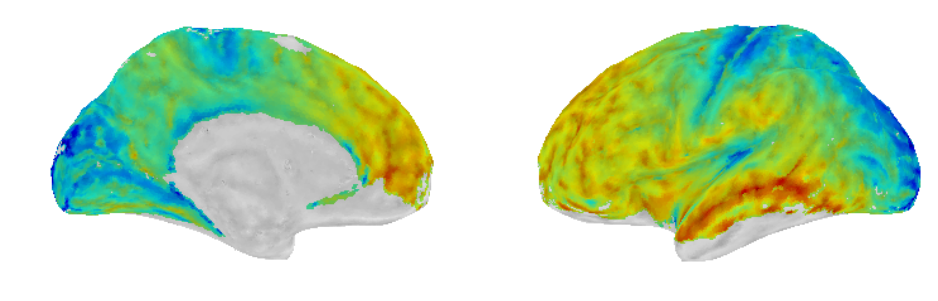

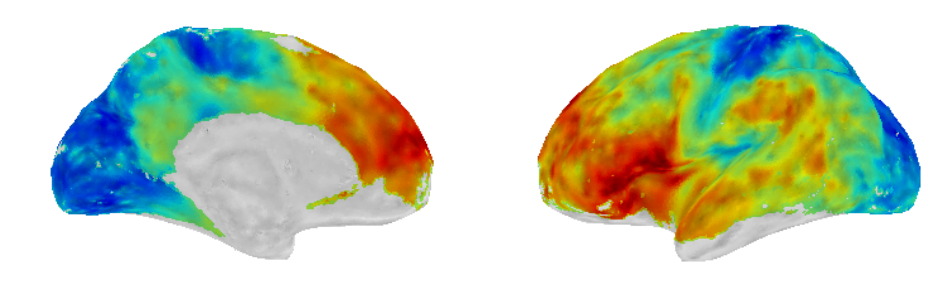

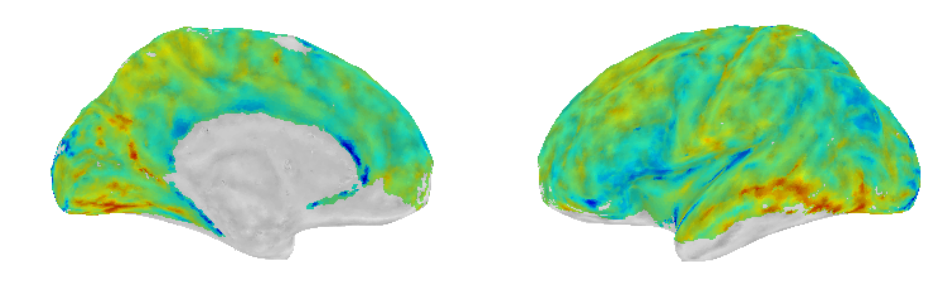

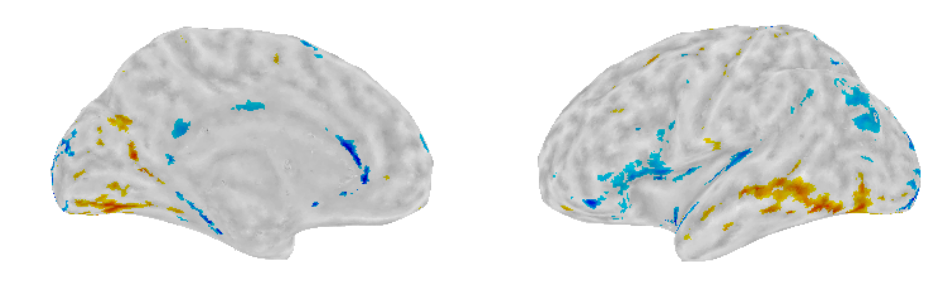

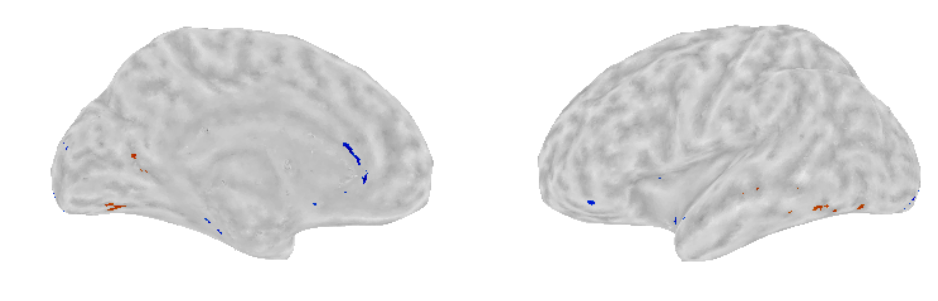

In [31]:
for toplot in [t1_predict_lh['t1_norm'], t1_predict_lh['modelled_fit_norm'], t1_predict_lh['residuals']]:
    plot_inflated(toplot, lv, lf, lh_sulc, 'left')
plot_inflated(t1_predict_lh['residuals'], lv, lf, lh_sulc, 'left', thr=1)
plot_inflated(t1_predict_lh['residuals'], lv, lf, lh_sulc, 'left', thr=2)

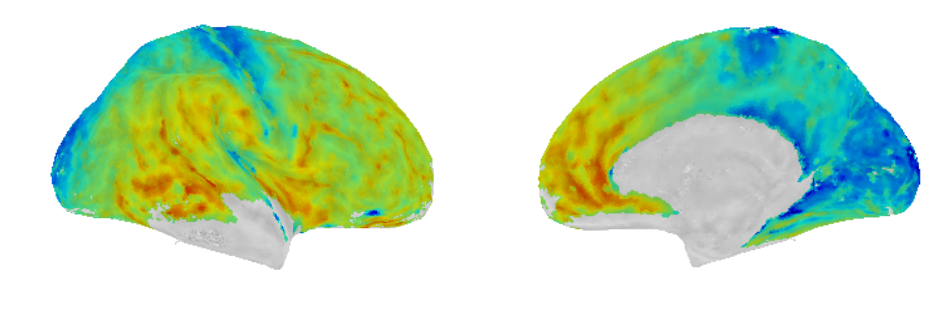

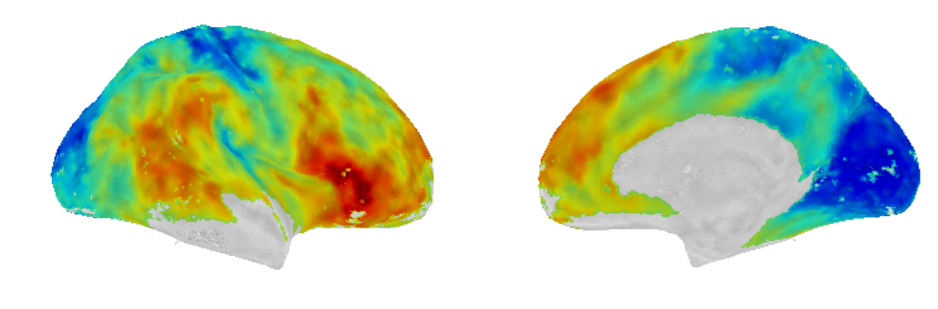

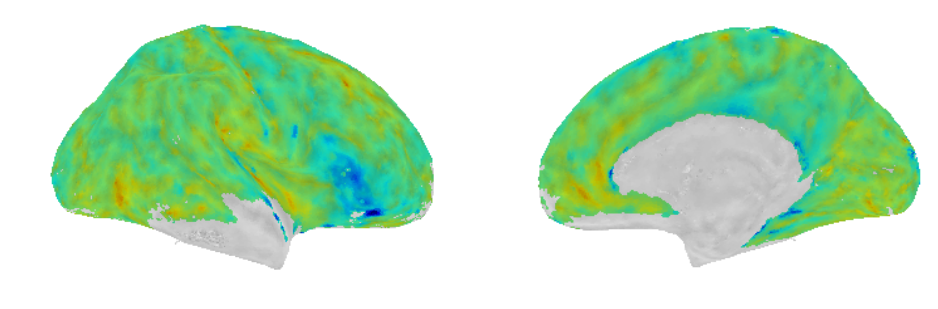

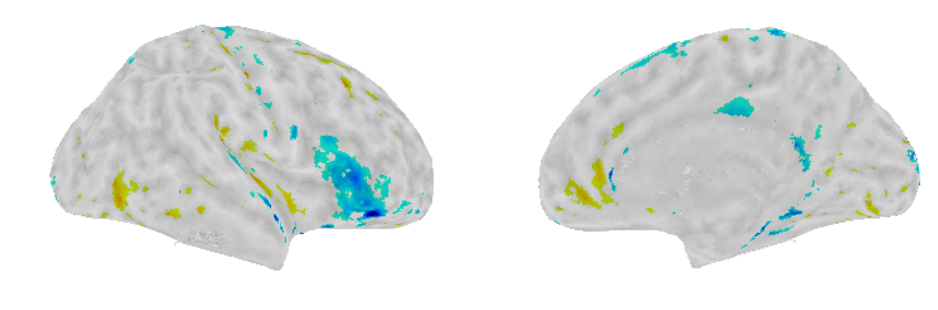

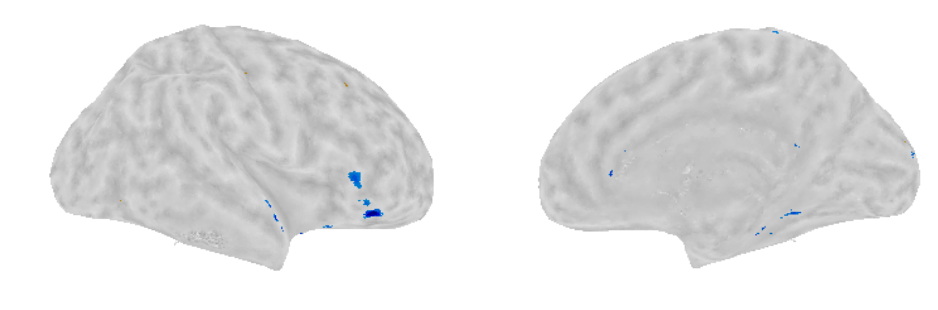

In [32]:
for toplot in [t1_predict_rh['t1_norm'], t1_predict_rh['modelled_fit_norm'], t1_predict_rh['residuals']]:
    plot_inflated(toplot, rv, rf, rh_sulc, 'right')
plot_inflated(t1_predict_rh['residuals'], rv, rf, rh_sulc, 'right', thr=1)
plot_inflated(t1_predict_rh['residuals'], rv, rf, rh_sulc, 'right', thr=2)

### Random data prediction

In [77]:
random_data_file = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/random/random_%s_%s_%s_t1avg_by_fc_maps_0_to_10.pkl'
smooth = 'smooth_6'
hemi='lh'

In [78]:
score_mean = 0
corr_mean = 0
coeff_mean = np.zeros((10))
count = 0

for iteration in range(100):
    pkl_in = open(random_data_file%(iteration, hemi, smooth), 'r')
    random_data = pickle.load(pkl_in)
    pkl_in.close()
    score_mean += random_data['score']
    corr_mean += random_data['corr'][0]
    coeff_mean += random_data['coef']
    count += 1

print hemi, smooth
print 'Score', score_mean/count
print 'Corr', corr_mean/count
print 'Coeff', coeff_mean/count

lh smooth_6
Score 0.0325545833967
Corr 0.176738400019
Coeff [  5.84754439e-04  -3.47864572e-05  -5.57386062e-04  -6.25249445e-06
  -5.52551713e-04   5.55650446e-04   9.14398300e-05   4.02218627e-05
  -2.71433133e-04  -1.45752640e-04]


In [76]:
random_data_file%(iteration, hemi, smooth)

'/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/random/random_99_lh_smooth_12_t1avg_by_fc_maps_0_to_10.pkl'

In [ ]:
for toplot in [random_data['t1_norm'], random_data['modelled_fit_norm'], random_data['residuals']]:
    plot_inflated(toplot, lv, lf, lh_sulc, 'left')
plot_inflated(random_data['residuals'], lv, lf, lh_sulc, 'left', thr=1)
plot_inflated(random_data['residuals'], lv, lf, lh_sulc, 'left', thr=2)